# How many neighbours of an entry overlap lexically?
Proportion of neigh that overlap in the first 100 neighbours.

In [4]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *
from gui.output_utils import *
from gui.user_code import pretty_names
from discoutils.thesaurus_loader import Vectors
from random import sample

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


In [5]:
path = '../FeatureExtractionToolkit/word2vec_vectors/composed/AN_NN_word2vec-wiki_15percent-rep0_Add.events.filtered.strings'
w = Vectors.from_tsv(path, allow_lexical_overlap=True)

In [6]:
w.init_sims(n_neighbors=100)

In [7]:
unigrams = list(x for x in w.keys() if x.count('_') < 1)
phrases = list(x for x in w.keys() if x.count('_') >= 1)

In [39]:
w.get_nearest_neighbours_linear.cache_clear()
%lprun -f Vectors.get_nearest_neighbours_linear w.get_nearest_neighbours_linear('car/N')

In [8]:
len(unigrams), len(phrases), len(w)

(65309, 1079757, 1145066)

In [9]:
ratios = []
for entry in random.sample(phrases, 100):
    before = w.get_nearest_neighbours(entry)
    after = Vectors.remove_overlapping_neighbours(entry, before)
    ratios.append(len(after) / len(before))

(0, 1)

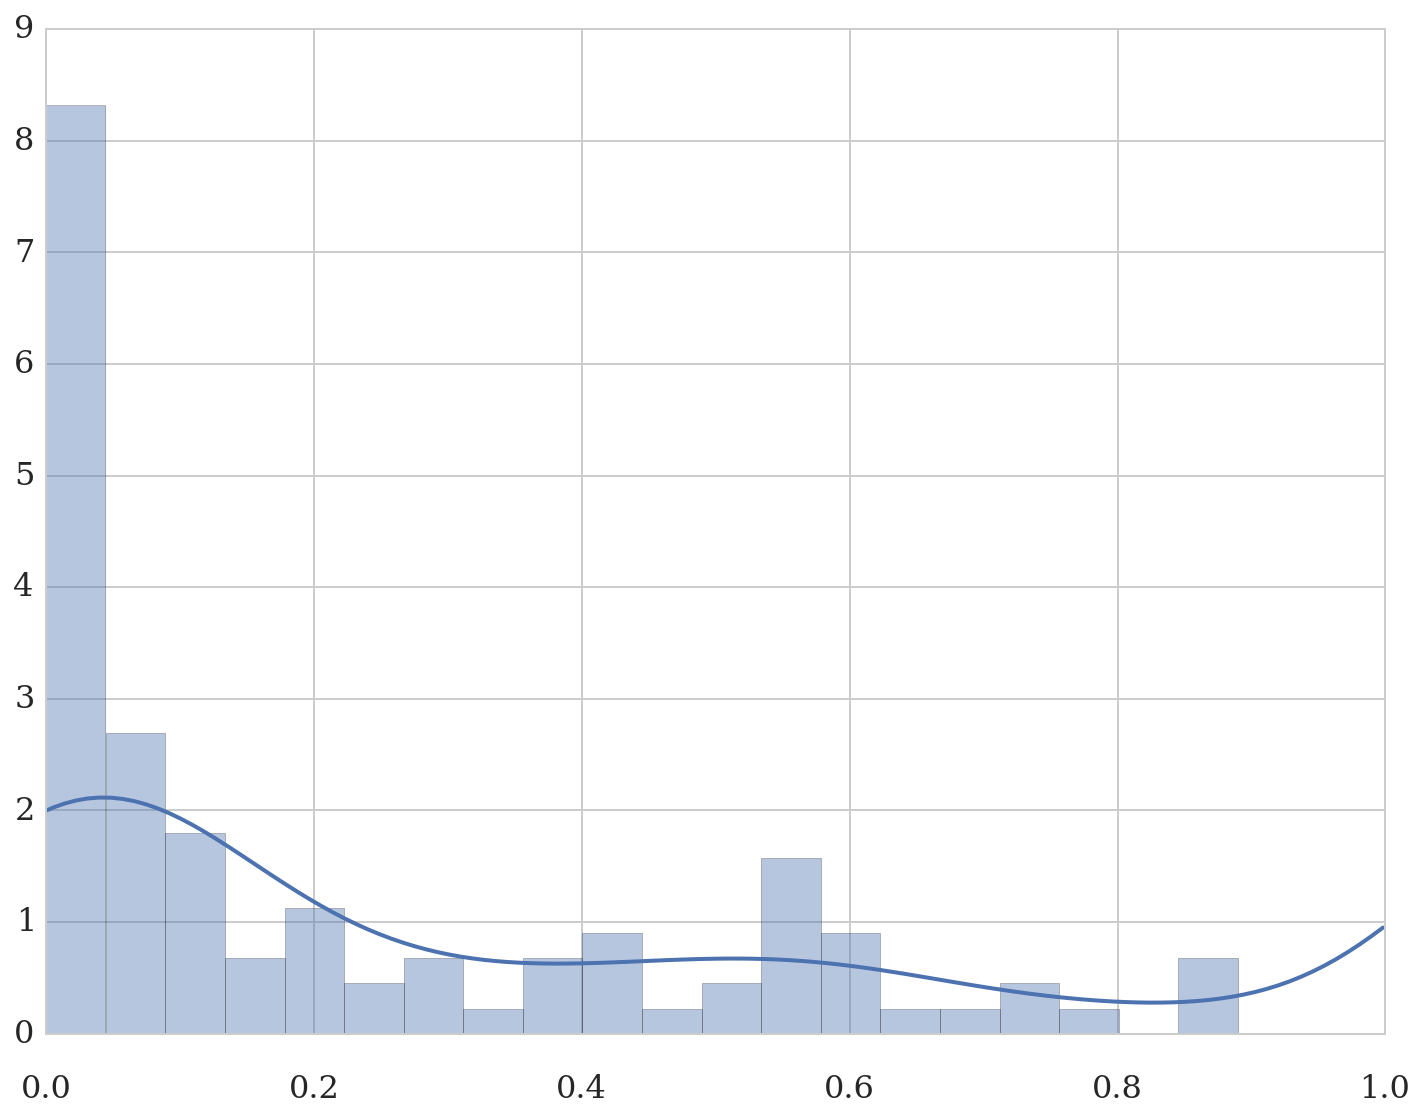

In [10]:
# plt.hist(ratios, bins=20);
ax = sns.distplot(np.array(ratios), bins=20, kde_kws=dict(cut=True))
ax.set_xlim(0, 1)

In [27]:
sns.kdeplot?